# Лабораторная работа 3. Анимация движения секущей прямой к заданной линии на плоскости

Четверикова Вера Борисовна, 23.03.2025

## Задание 3.1. Анимированное построение линии на плоскости

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
from matplotlib.animation import FuncAnimation

In [17]:
%matplotlib widget

### Реализация Задания 3.1b

<span style="color:red;">Создайте аналогичную анимацию</span> построения графика параметрической функции $x = x(t), y = y(t)$ по значениям $t$, последовательно изменяющимся от $t_{\text{min}}$ до $t_{\text{max}}$ с шагом $step$. Выполните задание для функции из Задания 1.4 в Лб1, согласно Вашему варианту. Значениями $t_{\text{min}}$ и $t_{\text{max}}$ выберите самостоятельно с учетом непрерывности параметрической функции на выбранном диапазоне, $step = (t_{\text{max}} - t_{\text{min}})/100$.

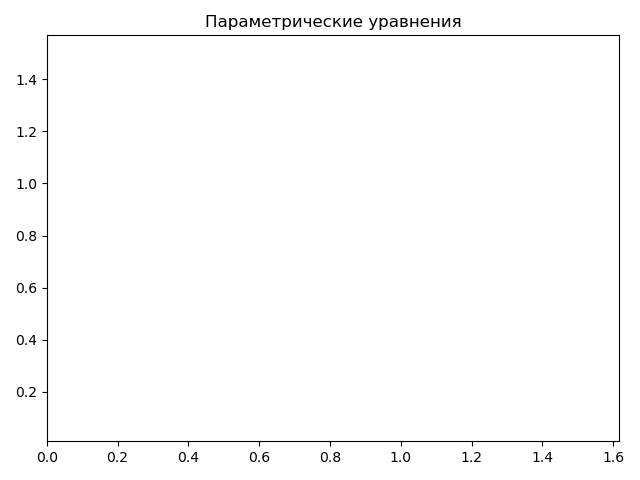

In [18]:
# Параметрические уравнения
t = np.linspace(-0.99, 0.99, 1000)  # Ограничиваем диапазон t, чтобы избежать деления на ноль
x_param = np.log(1 / np.sqrt(1 - t**4))
y_param = np.arcsin((1 - t**2) / (1 + t**2))

fig = plt.figure()

# График параметрических уравнений
ax2 = fig.add_subplot(1, 1, 1)
line, = ax2.plot([], [], color='blue')
ax2.set_title('Параметрические уравнения')
ax2.set_xlim(min(x_param), max(x_param))
ax2.set_ylim(min(y_param), max(y_param))

def init():
    line.set_data([], [])
    return line,

# Функция обновления анимации
def update(frame):
    line.set_data(x_param[:frame], y_param[:frame])
    return line,

# Создание анимации
anim = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, repeat=False)

plt.tight_layout()
plt.show()

In [19]:
plt.close()

## Задание 3.2. Движение точки по линии на плоскости

<span style="color:red;">Создайте анимацию</span> движения точки по заданной функции $x = x(t), y = y(t)$ по значениям $t$, последовательно изменяющимся от $t_{\text{min}}$ до $t_{\text{max}}$ с шагом $step$. Функция $x = x(t)$, $y = y(t)$ и значения переменных $t_{\text{min}}$, $t_{\text{max}}$ задаются такими же, как при выполнении Задания 3.1б.

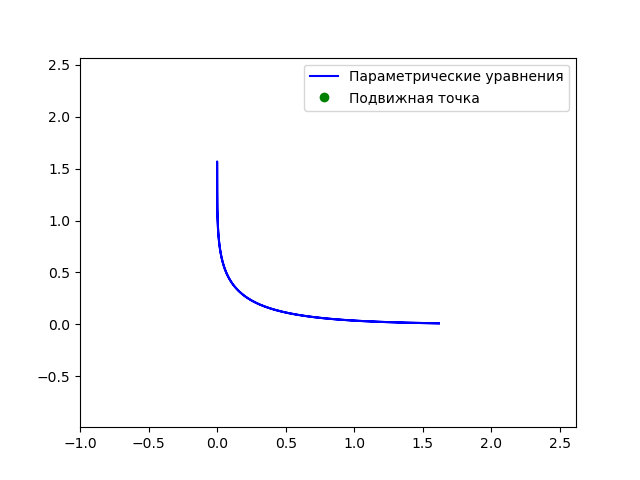

In [20]:
x_array = x_param
y_array = y_param

x_min, x_max = x_array.min(), x_array.max()
y_min, y_max = y_array.min(), y_array.max()

fig02 = plt.figure()
ax02 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

line01, = ax02.plot(x_param, y_param, 'b', label='Параметрические уравнения')
line02, = ax02.plot([], [], 'go', label='Подвижная точка')
plt.legend()

def init():
    line02.set_data([], [])
    return line02,

def at_frame02(frame):
    point = (x_param[frame], y_param[frame])
    line02.set_data([point[0]], [point[1]])
    return line02,

anim = FuncAnimation(fig02, at_frame02, frames=len(t), init_func=init, repeat=False, interval=20)

plt.show()

In [21]:
plt.close()

## Задание 3.3. Движение секущей прямой к заданной линии на плоскости (версия 1)

<span style="color:red;">Создайте анимацию</span> движения секущей прямой, проходящей через точки $А$ и $В$ до момента совпадении координат точек $А$ и $В$, когда секущая прямая становится касательной прямой к заданной линии в начальной точке $А$.

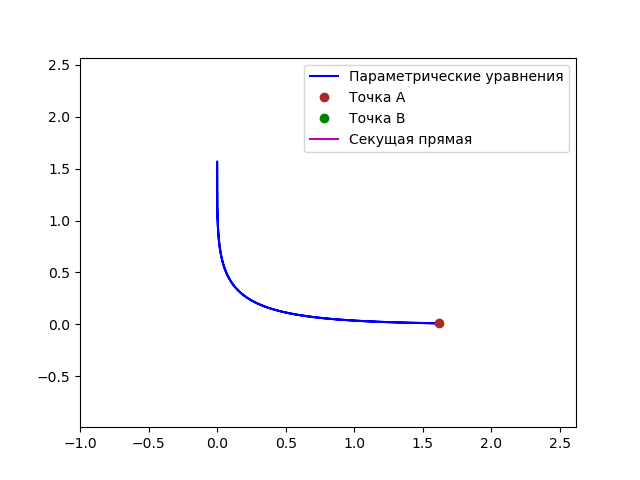

In [22]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

curve, = ax3.plot(x_array, y_array, 'b', label='Параметрические уравнения')
point_A, = ax3.plot([], [],  marker='o', color='brown', ls = '', label='Точка A') 
point_B, = ax3.plot([], [], 'go', label='Точка B')  
secant_line, = ax3.plot([], [], 'm', label='Секущая прямая')

A = np.array([x_array[0], y_array[0]])
point_A.set_data([A[0]], [A[1]]) 

def update(frame):
    B = np.array([x_array[frame], y_array[frame]])
    point_B.set_data([B[0]], [B[1]])
    
    # Обновление секущей прямой
    secant_line.set_xdata([A[0], B[0]])
    secant_line.set_ydata([A[1], B[1]])

    # Если точки A и B совпадают, обновляем секущую прямую на касательную
    if frame == len(x_array) - 1:
        dx = np.gradient(x_array)[0]
        dy = np.gradient(y_array)[0]
        slope = dy / dx  # Наклон касательной
        tangent_x = np.array([A[0] - 1, A[0] + 1])
        tangent_y = A[1] + slope * (tangent_x - A[0])  # Уравнение касательной
        secant_line.set_xdata(tangent_x)
        secant_line.set_ydata(tangent_y)

# Генерация кадров для анимации
frames = range(1, len(x_array)) 
ani = FuncAnimation(fig3, update, frames=frames, repeat=False, interval=20)

plt.legend()
plt.show()

In [23]:
plt.close()

<span style="color:red;">Напишите</span> пользовательскую функцию `at_frame3(t)`, которая будет вызываться в каждом кадре анимации, полагая, что аргумент `point` является массивом координат подвижной точки $В$. <span style="color:red;">Напишите</span> строки документации для пользовательской функции `at_frame3(t)`.

*Обратите внимание*, что при совпадении координат неподвижной точки $А$ и подвижной точки $B$ уравнение для задания секущей прямой через две точки возвращает только точку $А$. В этом случае векторно-параметрическое уравнение прямой должно быть заменено на уравнение касательной прямой в точке $А$. Вычисление производной в точке $А$, необходимое для построения касательной прямой, осуществите с помощью возможностей модуля `sympy`. Касательную прямую изобразите красным цветом.

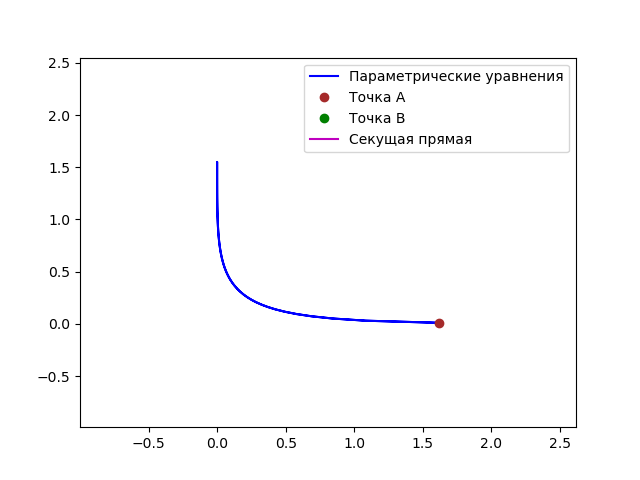

In [24]:
import sympy as sp

t_min = -0.99
t_max = 0.99
t = np.linspace(t_min, t_max, 100)
x_array = np.log(1 / np.sqrt(1 - t ** 4))
y_array = np.arcsin((1 - t ** 2) / (1 + t ** 2))

# Создание графика
fig3 = plt.figure()
ax3 = plt.axes()
ax3.set_xlim(x_array.min() - 1, x_array.max() + 1)
ax3.set_ylim(y_array.min() - 1, y_array.max() + 1)

curve, = ax3.plot(x_array, y_array, 'b', label='Параметрические уравнения')
point_A, = ax3.plot([], [], marker='o', color='brown', ls='', label='Точка A') 
point_B, = ax3.plot([], [], 'go', label='Точка B')  
secant_line, = ax3.plot([], [], 'm', label='Секущая прямая')

A = np.array([x_array[0], y_array[0]])
point_A.set_data([A[0]], [A[1]]) 

def at_frame3(t):
    A = np.array([x_array[0], y_array[0]])
    B = np.array([x_array[t], y_array[t]])
    point_B.set_data([B[0]], [B[1]])

    secant_line.set_xdata([A[0], B[0]])
    secant_line.set_ydata([A[1], B[1]])

    # Проверка на совпадение точек A и B
    if np.array_equal(A, B):
        x = sp.symbols('x')
        y_sym = sp.interpolate(list(zip(x_array, y_array)), x)
        derivative = sp.diff(y_sym, x)
        slope = derivative.evalf(subs={x: A[0]})

        # Уравнение касательной
        tangent_x = np.array([A[0] - 1, A[0] + 1])
        tangent_y = A[1] + slope * (tangent_x - A[0])
        
        # Обновление касательной прямой
        secant_line.set_color('red')
        secant_line.set_xdata(tangent_x)
        secant_line.set_ydata(tangent_y)

frames = range(1, len(x_array)) 
ani = FuncAnimation(fig3, at_frame3, frames=frames, repeat=False, interval=100)

plt.legend()
plt.show()

In [25]:
plt.close()

## Задание 3.4. Движение секущей прямой к заданной линии на плоскости (версия 2)

<span style="color:red;">Создайте анимацию</span> движения секущей прямой, проходящей через точки $А$ и $В$ до момента совпадении координат точек $А$ и $В$, когда секущая прямая становится касательной прямой к заданной линии в конечной точке $В$. Вычисление производной в точке $В$, необходимое для построения касательной прямой, осуществите с помощью возможностей модуля `sympy`. Касательную прямую изобразите красным цветом.

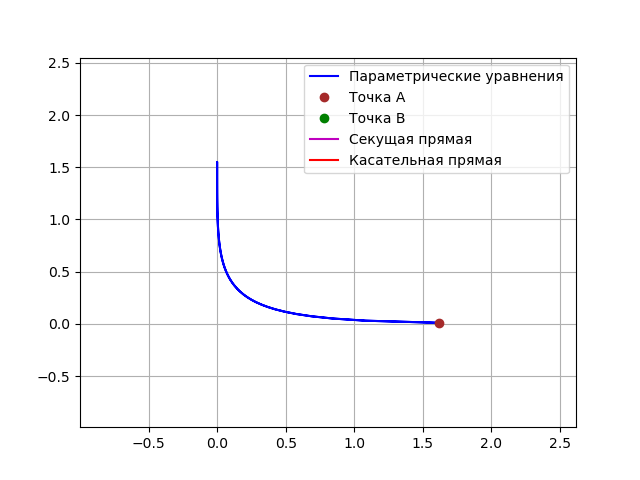

In [26]:
# Создание графика
fig3 = plt.figure()
ax3 = plt.axes()
ax3.set_xlim(x_array.min() - 1, x_array.max() + 1)
ax3.set_ylim(y_array.min() - 1, y_array.max() + 1)

curve, = ax3.plot(x_array, y_array, 'b', label='Параметрические уравнения')
point_A, = ax3.plot([], [], marker='o', color='brown', ls='', label='Точка A') 
point_B, = ax3.plot([], [], 'go', label='Точка B')  
secant_line, = ax3.plot([], [], 'm', label='Секущая прямая')
tangent_line, = ax3.plot([], [], 'r', label='Касательная прямая')

# Начальная позиция точки A
A = np.array([x_array[0], y_array[0]])
point_A.set_data([A[0]], [A[1]])

def at_frame3(t_index):
    A = np.array([x_array[0], y_array[0]])
    B = np.array([x_array[t_index], y_array[t_index]])
    point_B.set_data([B[0]], [B[1]])

    secant_line.set_xdata([A[0], B[0]])
    secant_line.set_ydata([A[1], B[1]])

    # Проверка на совпадение точек A и B
    if t_index > 0 and np.array_equal(A, B):
        x = sp.symbols('x')
        y_sym = sp.interpolate(list(zip(x_array, y_array)), x)
        derivative = sp.diff(y_sym, x)
        slope = derivative.evalf(subs={x: A[0]})

        # Уравнение касательной
        tangent_x = np.array([A[0] - 1, A[0] + 1])
        tangent_y = A[1] + slope * (tangent_x - A[0])
        
        # Обновление касательной прямой
        tangent_line.set_data(tangent_x, tangent_y)
    else:
        tangent_line.set_data([], [])

frames = range(1, len(x_array)) 
ani4 = FuncAnimation(fig3, at_frame3, frames=frames, repeat=False, interval=30)

plt.legend()
plt.grid()
plt.show()